<a href="https://colab.research.google.com/github/brianp0513/NLP-project/blob/main/Model_Vertification_NLP_Project_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# data preprocessing

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
%matplotlib inline
import time
import re
from wordcloud import WordCloud
import random
import os
from sklearn import metrics 
from scipy.spatial.distance import cdist 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [4]:
def getTextFromFiles(df, data_path, depression, limit):
    """Return Data Frame """

    for file in os.listdir(data_path)[:limit]:
        with open(data_path + "/" + file, 'r', encoding="ISO-8859-1") as file1:
            file1 = file1.read()
            df = df.append({'text': file1, 'depression': int(depression)}, ignore_index=True)

    return df


In [5]:
data_path_d = "/content/drive/My Drive/NLP Team/code/kerasData/reddit_depression"
data_path_nd = "/content/drive/My Drive/NLP Team/code/kerasData/reddit_non_depression"
df = pd.DataFrame(columns=['text', 'depression'])
df = getTextFromFiles(df, data_path_d, 1, 500)
df = getTextFromFiles(df, data_path_nd, 0, 500)

In [27]:
X = df['text'].to_numpy()
Y = df['depression'].to_numpy()
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

max_words = 1000
max_len = 150

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

# K mean

In [28]:
init_centroid = 'k-means++'
y_kmList = []
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {}
K = range(1,10)
X_train =  sequences_matrix

for k in K:
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k, init = init_centroid, random_state=0)
    y_km = kmeanModel.fit(X_train)  
      
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X_train.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

    y_kmList.append(y_km.labels_)

    mapping1[k] = sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X_train.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 



# print(np.shape(y_km))
# plt.scatter(X[y_km==0, 0], X[y_km==0,1],c='lightgreen',marker='s',s=510,label='cluster1')
# plt.scatter(X[y_km==1, 0], X[y_km==1,1],c='orange',marker='o',s=50,label='cluster2')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',marker='*',s=50,label='center')

# plt.legend()
# plt.grid(True)
# plt.show()


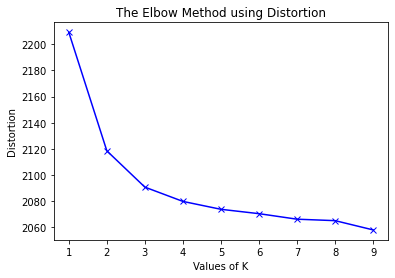

In [29]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [30]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 2209.206216597967
2 : 2118.560918268548
3 : 2090.818379007591
4 : 2079.9027890018074
5 : 2073.8690821725445
6 : 2070.533594452163
7 : 2066.3118646647035
8 : 2065.201050454867
9 : 2058.119842752626


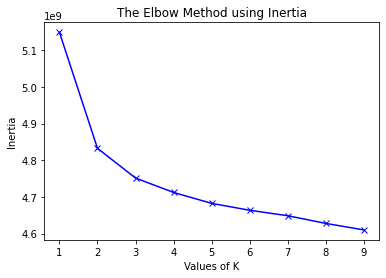

In [31]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [32]:
for key,val in mapping2.items(): 
    print(str(key)+' : '+str(val))

1 : 5148762236.799
2 : 4832398929.068593
3 : 4751314545.016071
4 : 4712111663.714475
5 : 4682340818.557597
6 : 4663497067.638751
7 : 4648641720.56499
8 : 4627717078.545485
9 : 4609935020.012277


In [ ]:
print(sequences_matrix)
print(y_kmList)

In [58]:
zero_list = []
one_list = []
two_list = []

for idx,iteration in enumerate(y_kmList[1]):
  if iteration == 1:
    one_list.append(idx)
  elif iteration == 2:
    two_list.append(idx)
  else:
    zero_list.append(idx)
print(zero_list)
print(one_list)
print(two_list)

[1, 2, 3, 4, 6, 7, 8, 9, 10, 13, 15, 17, 18, 23, 25, 26, 27, 29, 30, 32, 33, 34, 36, 41, 42, 44, 56, 57, 58, 59, 61, 62, 63, 65, 68, 69, 70, 72, 73, 74, 77, 81, 82, 85, 87, 92, 94, 97, 98, 99, 101, 105, 106, 107, 111, 114, 115, 119, 120, 123, 126, 127, 128, 129, 131, 132, 140, 141, 142, 143, 146, 147, 150, 152, 155, 157, 158, 164, 165, 166, 168, 169, 170, 175, 176, 178, 179, 180, 183, 186, 187, 189, 191, 192, 195, 199, 204, 207, 208, 209, 210, 214, 218, 220, 222, 223, 224, 225, 226, 229, 230, 232, 233, 235, 236, 238, 242, 243, 244, 246, 249, 250, 251, 253, 257, 259, 261, 264, 265, 267, 268, 269, 273, 276, 277, 278, 281, 284, 286, 287, 288, 289, 290, 294, 295, 296, 298, 299, 301, 304, 305, 309, 310, 316, 317, 318, 320, 324, 326, 327, 328, 329, 332, 333, 335, 336, 338, 340, 341, 342, 345, 346, 347, 348, 350, 352, 353, 357, 358, 359, 360, 362, 363, 365, 366, 367, 368, 369, 371, 372, 373, 374, 378, 384, 390, 391, 392, 394, 396, 398, 399, 400, 401, 402, 405, 406, 407, 408, 410, 411, 412, 41

In [59]:
# print(X.shape)
cluster_zero = []
cluster_one = []
cluster_two = []
for index in zero_list:
  sentence = X[index]
  cluster_zero.append(sentence)
  
# print(cluster_zero)
for index in one_list:
  sentence = X[index]
  cluster_one.append(sentence)

for index in two_list:
  sentence = X[index]
  cluster_two.append(sentence)


print(cluster_one)

["I want to pay off my debt then kill myself.\nI came from a really poor family, worked hard during primary and secondary school. Got a scholarship for college which paid me 10k a year as well as covering my school fees. Gave parents the money, it paid for the bills as well as my siblings's school fees. Thought life was good, studying what i love. However, i got bullied until i cant take it anymore and requested a change of class, the school rejected my request. I then requested to take a semester off school, but the contract for the scholarship states that i have to complete school by 3 years or the contract will be terminated. Failed a module and i have to extend my time in college by a year, which caused my scholarship to be terminated. Which in turn placed me in a 30k debt. Now, i don't have money to pay for school, so i had to leave. Im out without any qualifications except for a secondary school cert, with the organisation that offered me the scholarship requesting 1k per month f

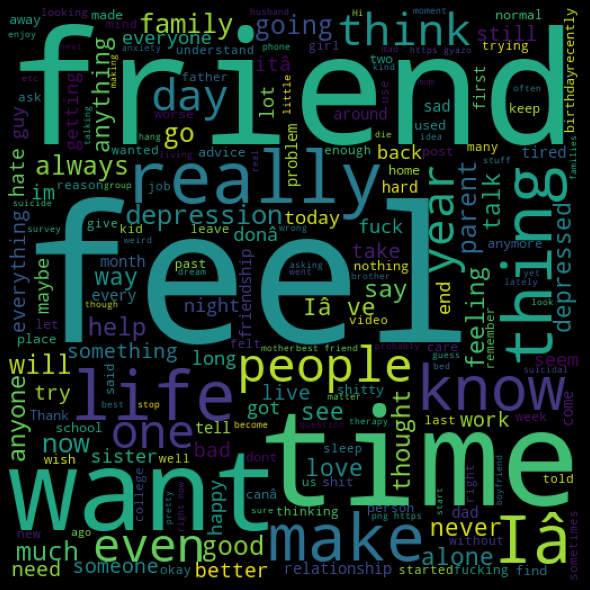

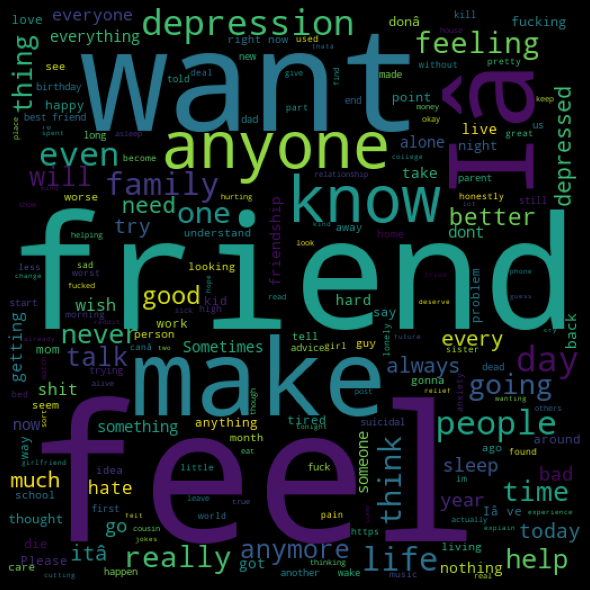

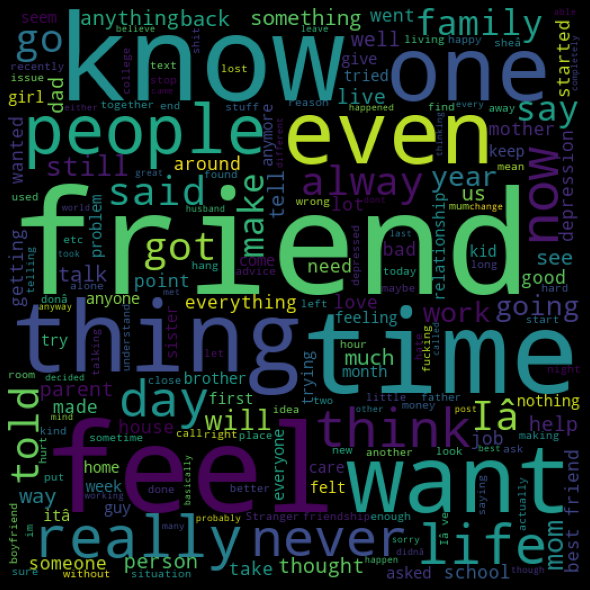

In [36]:
def makeWorldCloud(llist):
  depression_words = ''.join(llist)
  depression_wordclod = WordCloud(width = 512,height = 512).generate(depression_words)
  plt.figure(figsize = (10, 8), facecolor = 'k')
  plt.imshow(depression_wordclod)
  plt.axis('off')
  plt.tight_layout(pad = 0)
  plt.show()
makeWorldCloud(cluster_zero)
makeWorldCloud(cluster_one)
makeWorldCloud(cluster_two)

# LSTM

In [60]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

max_words = 1000
max_len = 150

tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_words,50,input_length=max_len))
model.add(tf.keras.layers.LSTM(64))
model.add(tf.keras.layers.Dense(256,name='FC1'))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,name='out_layer'))
model.add(tf.keras.layers.Activation('sigmoid'))

model.build(input_shape=sequences_matrix.shape)
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

model.fit(sequences_matrix.astype(float), Y_train.astype(float), batch_size=4,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])


sequences_zeroClust = tok.texts_to_sequences(X[zero_list])
sequences_matrix_zeroClust = sequence.pad_sequences(sequences_zeroClust,maxlen=max_len)
sequences_oneClust = tok.texts_to_sequences(X[one_list])
sequences_matrix_oneClust = sequence.pad_sequences(sequences_oneClust,maxlen=max_len)
# sequences_twoClust = tok.texts_to_sequences(X[two_list])
# sequences_matrix_twoClust = sequence.pad_sequences(sequences_twoClust,maxlen=max_len)
# accr = model.evaluate(test_sequences_matrix,Y_test.astype(float))
predictions1 = model.predict(sequences_matrix_zeroClust)
predictions2 = model.predict(sequences_matrix_oneClust)
# predictions3 = model.predict(sequences_matrix_twoClust)

Epoch 1/10
170/170 [==============================] - 2s 11ms/step - loss: 0.6470 - accuracy: 0.6309 - val_loss: 0.5726 - val_accuracy: 0.7824
Epoch 2/10
170/170 [==============================] - 2s 9ms/step - loss: 0.3852 - accuracy: 0.8574 - val_loss: 0.4240 - val_accuracy: 0.7941
Epoch 3/10
170/170 [==============================] - 1s 8ms/step - loss: 0.2676 - accuracy: 0.9000 - val_loss: 0.5145 - val_accuracy: 0.7882


In [61]:
print(np.around(predictions1).astype(bool).mean())
print(np.around(predictions2).astype(bool).mean())
# print(np.around(predictions3).astype(bool).mean())

0.6658595641646489
0.4752981260647359
